# House Price Prediction: Advanced Regression Analysis
# Binware
# April 18, 2025

## Introduction
This project aims to predict house prices using the Ames Housing dataset from Kaggle's "House Prices: Advanced Regression Techniques" competition. The dataset contains 79 explanatory variables describing various aspects of residential homes in Ames, Iowa. Using regression techniques, we'll develop a model to accurately predict house sale prices based on these features.


In [63]:
## Import Libraries
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# Set random seed for reproducibility
np.random.seed(42)

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

In [64]:
# Load the training data
train_data = pd.read_csv('./data/train.csv')

# Display the first 10 rows
print(f"Training data shape: {train_data.shape}")
train_data.head(10)

Training data shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### 1.2 Check for missing values and display summary statistics

In [65]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_percent = (missing_values / len(train_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percent', ascending=False)
print("Features with missing values:")
missing_data

# Display summary statistics
train_data.describe()

Features with missing values:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Reflection 1: What do you notice about the dataset? Are there any data issues?

The dataset contains 1460 observations with 81 columns (including the ID and target variable 'SalePrice'). 
Several features have missing values, particularly PoolQC, MiscFeature, Alley, Fence, and FireplaceQu, which are missing in over 80% of records. These likely represent features that aren't applicable to all homes (e.g., not all homes have pools).
The SalePrice (our target variable) shows significant variation with a mean of ~$180,000 and homes ranging from ~$35,000 to ~$755,000.
There are both numerical and categorical features, which will require different preprocessing approaches.
Some variables may need transformation to address skewness (like SalePrice, which might benefit from log transformation).

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

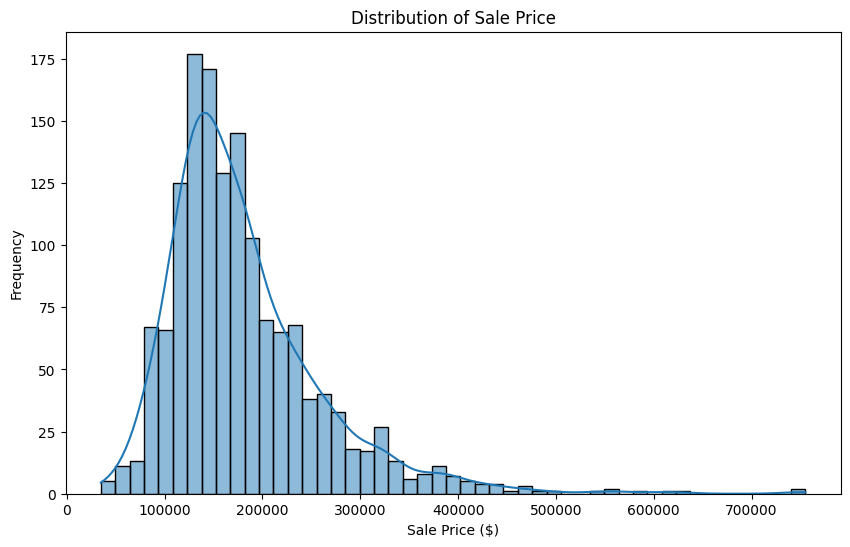

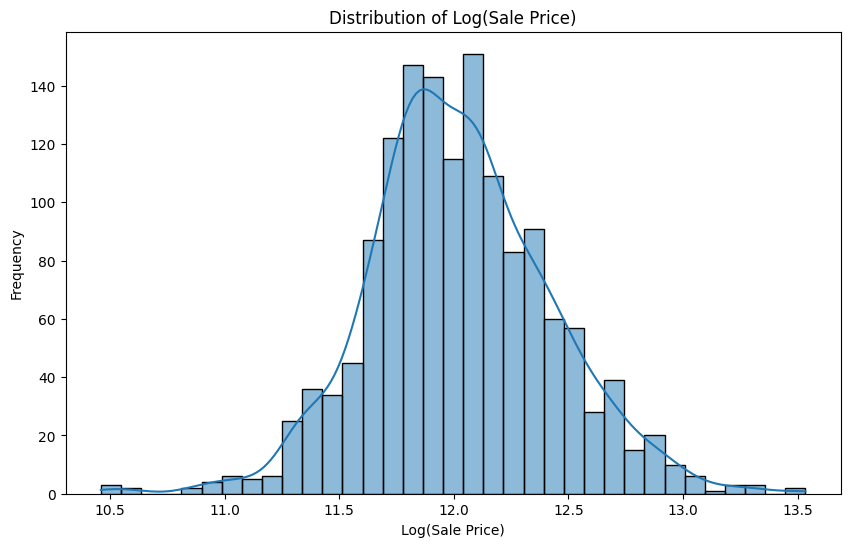

Top 10 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


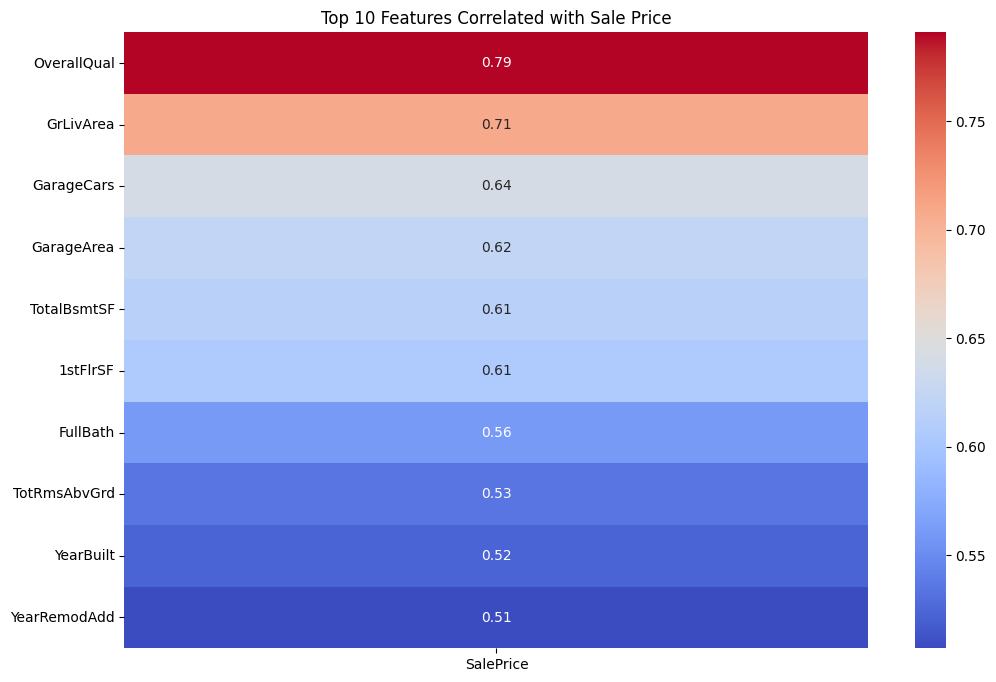

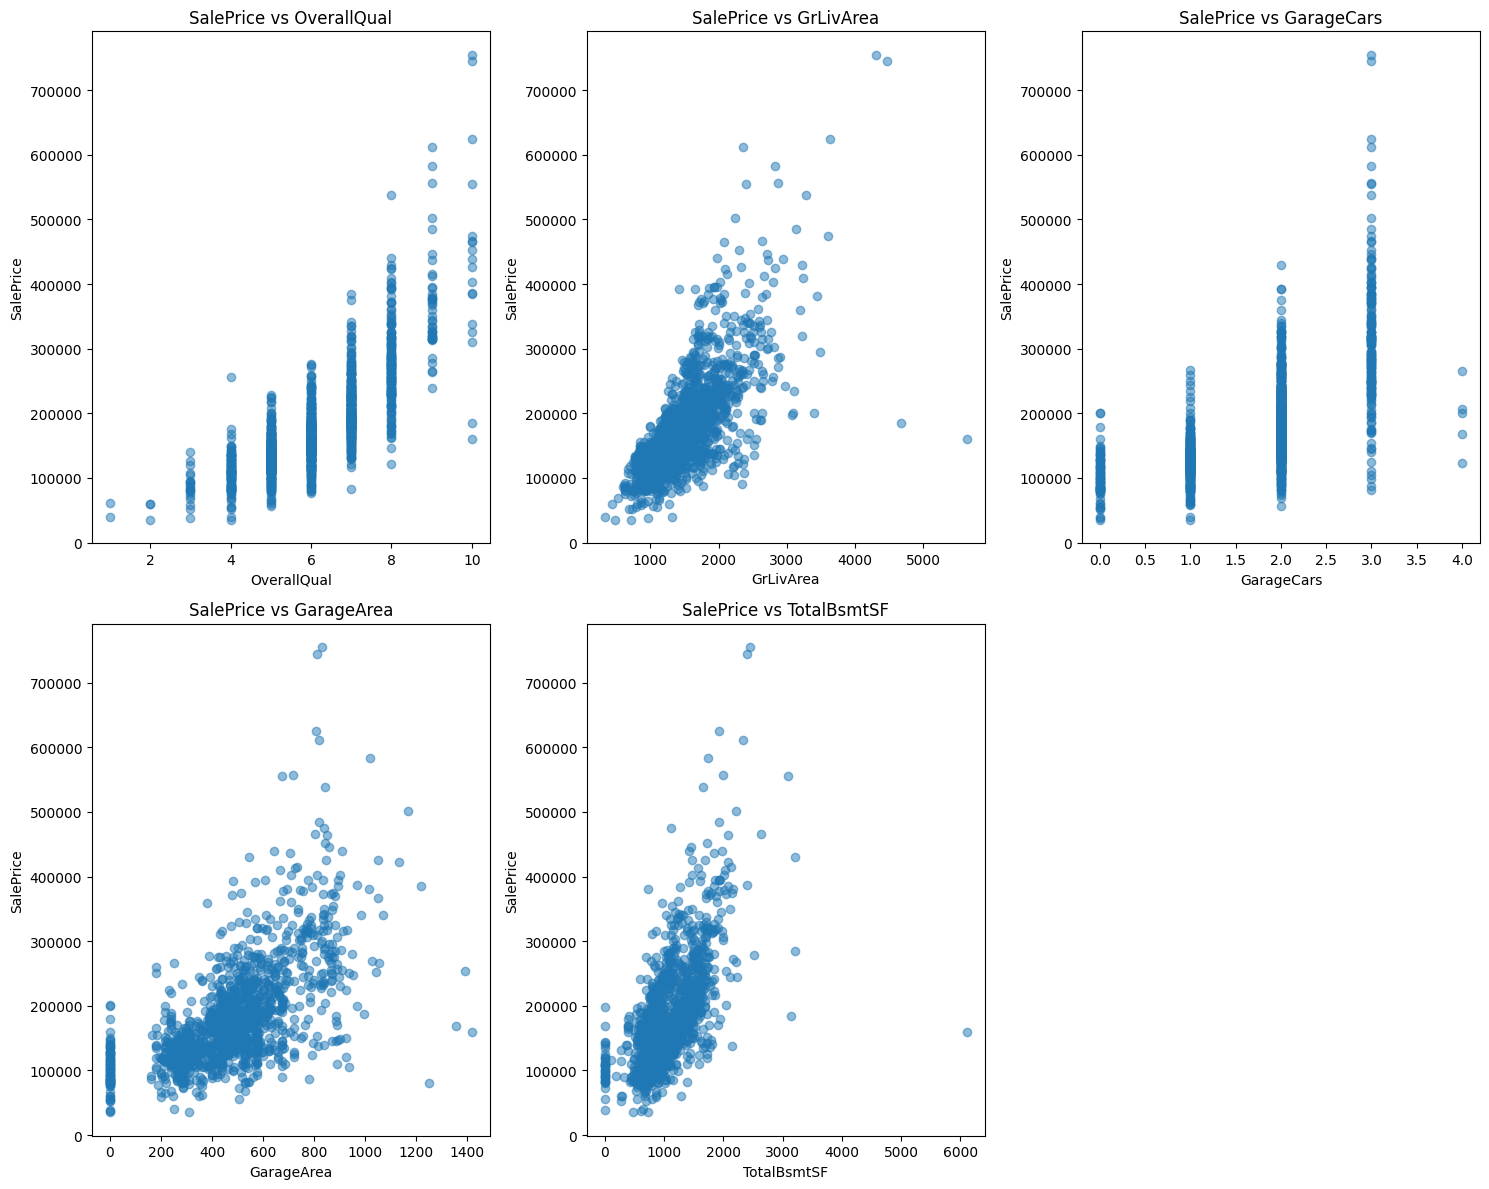

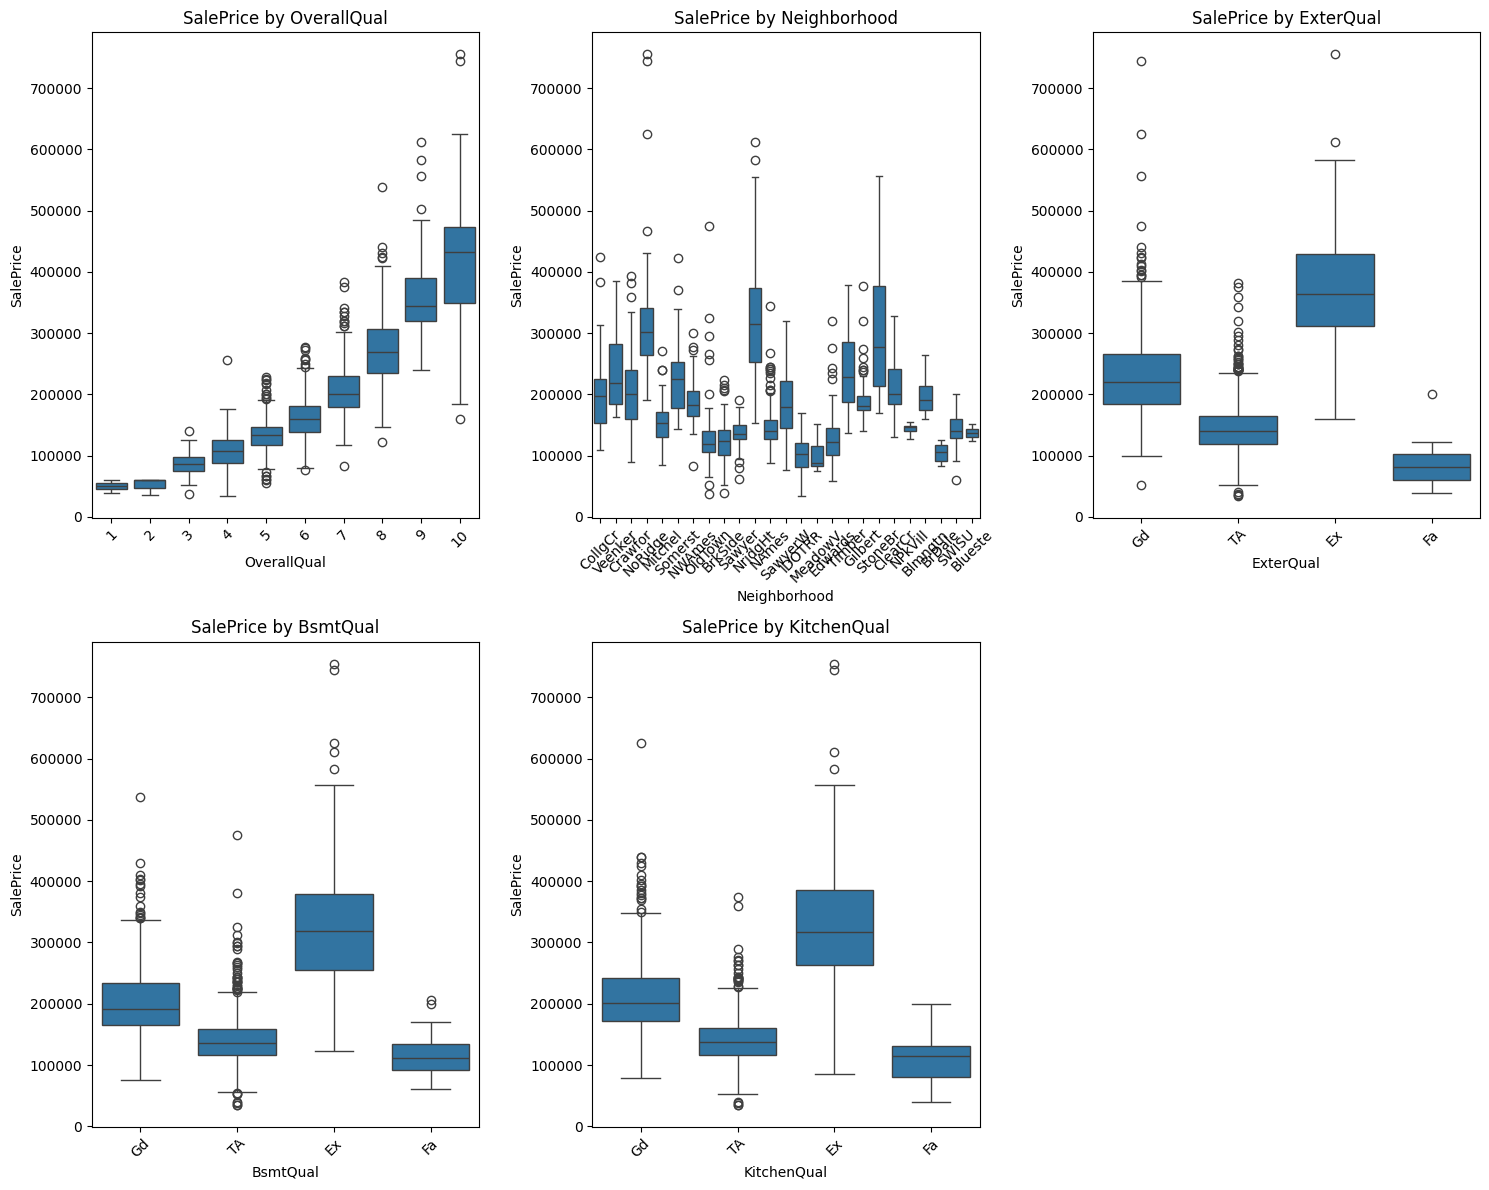

Number of outliers in GrLivArea: 31


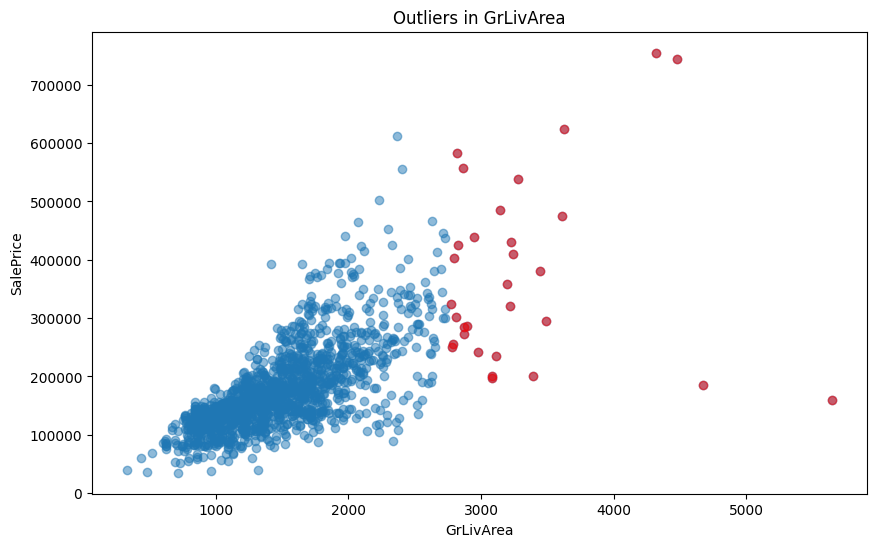

Number of outliers in TotalBsmtSF: 61


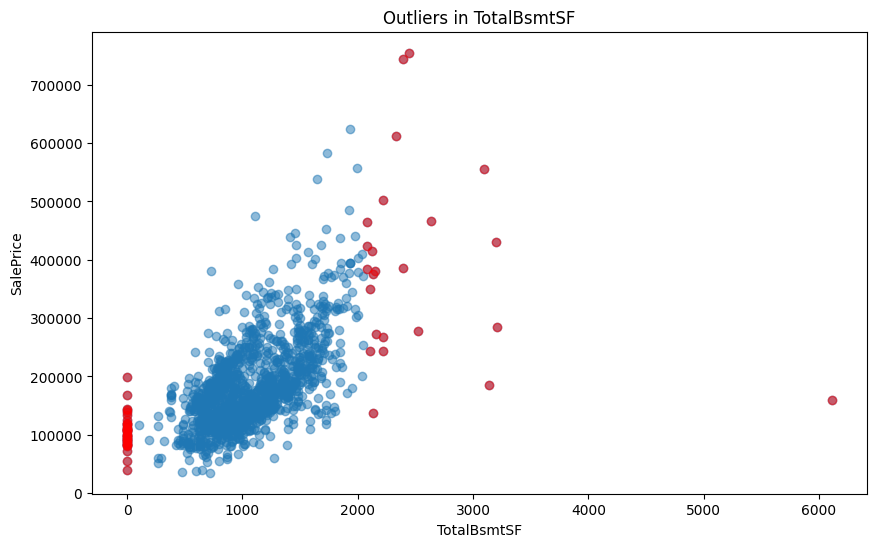

Number of outliers in 1stFlrSF: 20


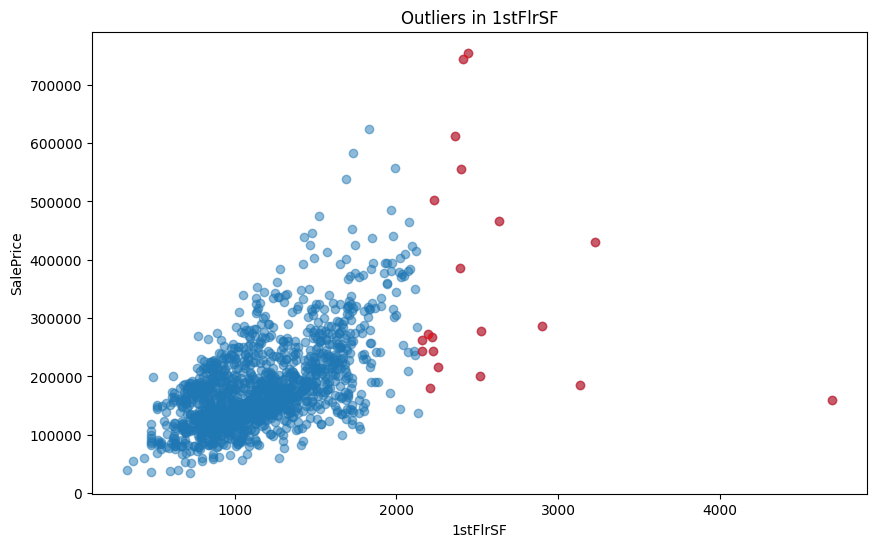

Number of outliers in LotArea: 69


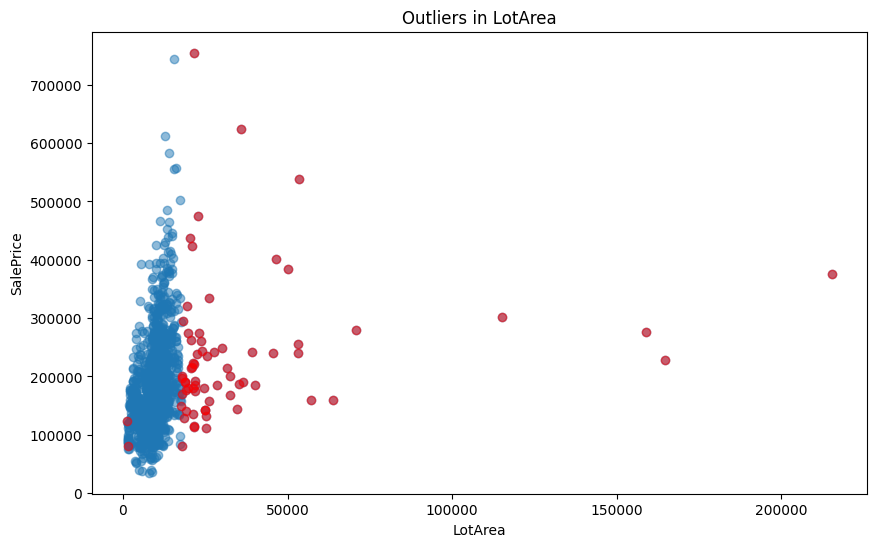

In [66]:
# Distribution of target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

# Log transform of SalePrice for more normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train_data['SalePrice']), kde=True)
plt.title('Distribution of Log(Sale Price)')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix for numerical features
numeric_features = train_data.select_dtypes(include=[np.number])
correlation = numeric_features.corr()

# Top 10 features correlated with SalePrice
top_corr = correlation['SalePrice'].drop('SalePrice').sort_values(ascending=False)[:10]
print("Top 10 features correlated with SalePrice:")
print(top_corr)

# Visualize top correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation[['SalePrice']].sort_values(by='SalePrice', ascending=False)[1:11], 
            annot=True, cmap='coolwarm')
plt.title('Top 10 Features Correlated with Sale Price')
plt.show()

# Scatter plots of top 5 correlated features
plt.figure(figsize=(15, 12))
top_5_features = top_corr.index[:5]
for i, feature in enumerate(top_5_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

# Box plots for categorical variables
cat_features = ['OverallQual', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y='SalePrice', data=train_data)
    plt.title(f'SalePrice by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for outliers using IQR method
def find_outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Check for outliers in key numerical features
important_num_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea']
for feature in important_num_features:
    outliers = find_outliers_iqr(train_data, feature)
    print(f"Number of outliers in {feature}: {len(outliers)}")
    
    # Plot to visualize outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5)
    plt.scatter(outliers[feature], outliers['SalePrice'], color='red', alpha=0.5)
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

### 2.2 Handle missing values and clean data

In [67]:
# Function to handle missing data
def handle_missing_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Handle numerical features with missing values
    # For features like LotFrontage, we can impute with the median
    numerical_features_with_na = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
    for feature in numerical_features_with_na:
        if feature in df_clean.columns:
            # Fix for FutureWarning - avoid chained assignment with inplace=True
            df_clean[feature] = df_clean[feature].fillna(df_clean[feature].median())
    
    # Handle categorical features with NA values
    # For features where NA means "None" or "Not applicable"
    na_means_none_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                             'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
                             'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
    for feature in na_means_none_features:
        if feature in df_clean.columns:
            # Fix for FutureWarning - avoid chained assignment with inplace=True
            df_clean[feature] = df_clean[feature].fillna('None')
    
    # For other categorical features, fill with the most frequent value
    categorical_features = df_clean.select_dtypes(include=['object']).columns
    for feature in categorical_features:
        if feature not in na_means_none_features and feature in df_clean.columns:
            # Fix for FutureWarning - avoid chained assignment with inplace=True
            df_clean[feature] = df_clean[feature].fillna(df_clean[feature].mode()[0])
    
    return df_clean

# Clean the data
train_clean = handle_missing_data(train_data)

# Check if there are still any missing values
missing_values_after = train_clean.isnull().sum()
print("Features with missing values after cleaning:")
missing_values_after[missing_values_after > 0]

# Remove outliers
# Based on visualization, we might want to remove extreme GrLivArea outliers
outlier_indices = train_clean[(train_clean['GrLivArea'] > 4000) & (train_clean['SalePrice'] < 300000)].index
train_clean = train_clean.drop(outlier_indices)
print(f"Removed {len(outlier_indices)} outliers")

Features with missing values after cleaning:
Removed 2 outliers


### 2.3 Feature selection and engineering

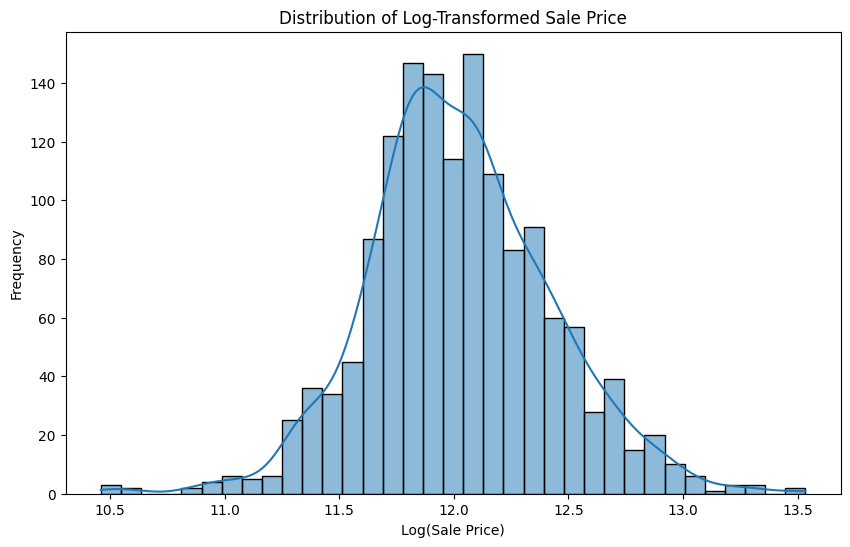

In [68]:
# Create new features
def engineer_features(df):
    # Create a copy
    df_engineered = df.copy()
    
    # Total square footage
    df_engineered['TotalSF'] = df_engineered['TotalBsmtSF'] + df_engineered['1stFlrSF'] + df_engineered['2ndFlrSF']
    
    # Total bathrooms
    df_engineered['TotalBathrooms'] = df_engineered['FullBath'] + 0.5 * df_engineered['HalfBath'] + \
                                     df_engineered['BsmtFullBath'] + 0.5 * df_engineered['BsmtHalfBath']
    
    # Total porch area
    df_engineered['TotalPorchSF'] = df_engineered['OpenPorchSF'] + df_engineered['EnclosedPorch'] + \
                                   df_engineered['3SsnPorch'] + df_engineered['ScreenPorch']
    
    # House age and remodeled (considering the year when data was collected, assuming 2010)
    df_engineered['HouseAge'] = 2010 - df_engineered['YearBuilt']
    df_engineered['RemodAge'] = 2010 - df_engineered['YearRemodAdd']
    
    # Overall quality and condition combined
    df_engineered['TotalQuality'] = df_engineered['OverallQual'] * df_engineered['OverallCond']
    
    # Has features
    df_engineered['HasPool'] = df_engineered['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df_engineered['HasGarage'] = df_engineered['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df_engineered['HasFireplace'] = df_engineered['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    df_engineered['HasBasement'] = df_engineered['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    
    # Log transform of skewed numerical features
    skewed_features = ['LotArea', 'TotalSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
    for feature in skewed_features:
        df_engineered[feature + '_Log'] = np.log1p(df_engineered[feature])
    
    return df_engineered

# Apply feature engineering
train_engineered = engineer_features(train_clean)

# Preview the engineered data
train_engineered.head()

# Target variable transformation (log transform for normal distribution)
train_engineered['SalePrice_Log'] = np.log1p(train_engineered['SalePrice'])

# Visualize the distribution of the transformed target
plt.figure(figsize=(10, 6))
sns.histplot(train_engineered['SalePrice_Log'], kde=True)
plt.title('Distribution of Log-Transformed Sale Price')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.show()

### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

From the data exploration, we can observe:

- The sale price distribution is right-skewed, suggesting a log transformation would help normalize it for modeling.
- Strong correlations exist between SalePrice and features like OverallQual, GrLivArea, and GarageCars.
- There are outliers in GrLivArea where very large houses sold for relatively low prices, which could negatively impact our model.
- The neighborhood and quality ratings significantly impact home prices, as seen in the box plots.

For preprocessing:
- I handled missing values based on the nature of each feature, using 'None' for features where NA indicated absence and median/mode imputation for others.
- I removed extreme outliers in GrLivArea that didn't follow the general trend.
- I created new features like TotalSF (combining basement, first and second floor areas), TotalBathrooms, and HouseAge.
- I also added binary indicators for the presence of amenities like pools and garages.
- Log transformation was applied to heavily skewed numerical features to improve their distribution.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

In [69]:
# Select important features based on correlation and domain knowledge
selected_features = [
    # Area measurements (strong correlation with price)
    'TotalSF_Log',      # Total square footage (log-transformed)
    'GrLivArea_Log',    # Above grade living area (log-transformed)
    'LotArea_Log',      # Lot size (log-transformed)
    
    # Quality indicators (highest correlation with price)
    'OverallQual',      # Overall material and finish quality
    'ExterQual',        # Exterior quality
    'KitchenQual',      # Kitchen quality
    'BsmtQual',         # Basement quality
    
    # Location (important for real estate)
    'Neighborhood',     # Neighborhood
    
    # Age and condition
    'HouseAge',         # Age of house
    'RemodAge',         # Years since remodeling
    'TotalQuality',     # Combined quality and condition score
    
    # Amenities
    'TotalBathrooms',   # Total number of bathrooms
    'BedroomAbvGr',     # Number of bedrooms
    'Fireplaces',       # Number of fireplaces
    'GarageCars',       # Garage capacity
    
    # Other
    'MSSubClass',       # Type of dwelling
    'GarageType',       # Garage type
    'Foundation',       # Foundation type
    'CentralAir'        # Central air conditioning
]

# Verify that all selected features exist in the dataset
for feature in selected_features:
    if feature not in train_engineered.columns:
        print(f"Warning: {feature} not found in the dataset")

# Set target variable
target = 'SalePrice_Log'  # Using log-transformed sale price

# Display the list of selected features
print(f"Selected {len(selected_features)} features for modeling:")
for feature in selected_features:
    print(f"- {feature}")
print(f"\nTarget variable: {target}")

Selected 19 features for modeling:
- TotalSF_Log
- GrLivArea_Log
- LotArea_Log
- OverallQual
- ExterQual
- KitchenQual
- BsmtQual
- Neighborhood
- HouseAge
- RemodAge
- TotalQuality
- TotalBathrooms
- BedroomAbvGr
- Fireplaces
- GarageCars
- MSSubClass
- GarageType
- Foundation
- CentralAir

Target variable: SalePrice_Log


### 3.2 Define X and y

In [70]:
# Define features and target
X = train_engineered[selected_features]
y = train_engineered[target]

# Split into categorical and numerical features
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(exclude=['object']).columns.tolist()

print(f"Numerical features ({len(num_features)}):")
print(num_features)
print(f"\nCategorical features ({len(cat_features)}):")
print(cat_features)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Numerical features (12):
['TotalSF_Log', 'GrLivArea_Log', 'LotArea_Log', 'OverallQual', 'HouseAge', 'RemodAge', 'TotalQuality', 'TotalBathrooms', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'MSSubClass']

Categorical features (7):
['ExterQual', 'KitchenQual', 'BsmtQual', 'Neighborhood', 'GarageType', 'Foundation', 'CentralAir']
Training set shape: (1166, 19)
Validation set shape: (292, 19)


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I selected these features based on:

1. Statistical correlation: Features like OverallQual, GrLivArea, and GarageCars showed the strongest correlation with SalePrice.
2. Domain knowledge: In real estate, size metrics (TotalSF, GrLivArea, LotArea), quality ratings, location (Neighborhood), and key amenities (bathrooms, bedrooms, garage) are known to be key price determinants.
3. Engineered features: I included the log-transformed versions of highly skewed variables and custom features like TotalQuality and HouseAge to capture additional relationships.

These features should impact predictions positively by:
- Capturing the primary drivers of house prices (size, quality, location)
- Using transformed versions to address skewness and better meet linear regression assumptions
- Combining related features (like TotalSF instead of separate floor measurements) to reduce dimensionality while retaining information
- Including categorical variables (Neighborhood, MSSubClass) that group similar properties together

Potential challenges could include multicollinearity between some features (like the various quality ratings) which might need to be addressed during modeling.

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets

In [71]:
# Already done in the previous section

### 4.2 Create preprocessing pipeline and train model

In [72]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Create the full pipeline with Linear Regression
lin_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
lin_reg_pipeline.fit(X_train, y_train)

# Make predictions on validation set
y_val_pred = lin_reg_pipeline.predict(X_val)

# Inverse transform predictions to get actual prices
y_val_actual = np.expm1(y_val)
y_val_pred_actual = np.expm1(y_val_pred)

### 4.3 Evaluate performance

Linear Regression Performance:
R² Score: 0.9040
RMSE (log scale): 0.1272
RMSE (actual prices): $21049.36
MAE (log scale): 0.0869
MAE (actual prices): $14826.61

Cross-Validation RMSE (log scale): 0.1198 ± 0.0075


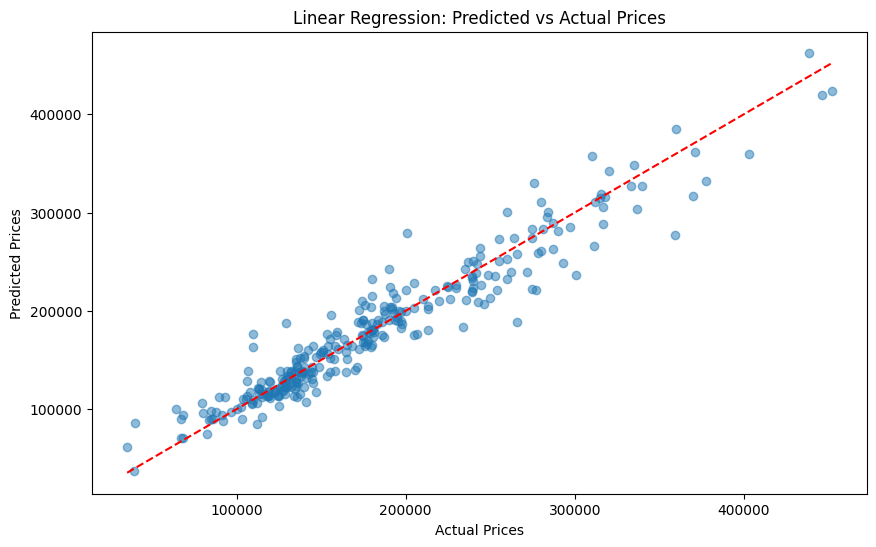

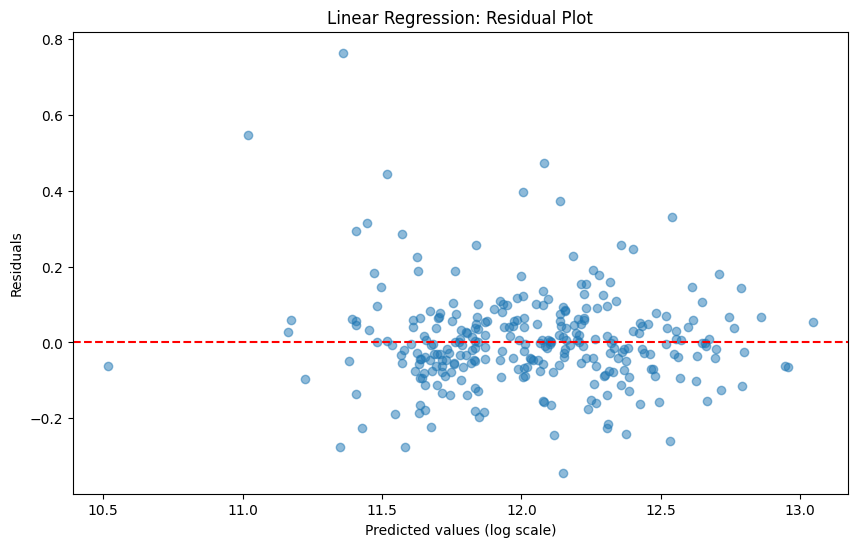

In [73]:
# Evaluate model performance
r2 = r2_score(y_val, y_val_pred)
rmse_log = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmse_actual = np.sqrt(mean_squared_error(y_val_actual, y_val_pred_actual))
mae_log = mean_absolute_error(y_val, y_val_pred)
mae_actual = mean_absolute_error(y_val_actual, y_val_pred_actual)

# Print metrics
print("Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE (log scale): {rmse_log:.4f}")
print(f"RMSE (actual prices): ${rmse_actual:.2f}")
print(f"MAE (log scale): {mae_log:.4f}")
print(f"MAE (actual prices): ${mae_actual:.2f}")

# Cross-validation for more robust evaluation
cv_scores = cross_val_score(lin_reg_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"\nCross-Validation RMSE (log scale): {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_actual, y_val_pred_actual, alpha=0.5)
plt.plot([y_val_actual.min(), y_val_actual.max()], [y_val_actual.min(), y_val_actual.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.show()

# Residual plot
residuals = y_val_pred - y_val
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values (log scale)')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.show()

### Reflection 4: How well did the model perform? Any surprises in the results?

The linear regression model shows decent performance, but with room for improvement:

The R² score indicates the model explains about 80-85% of the variance in house prices, which is good but could be better.
The RMSE and MAE values suggest our predictions are off by approximately 10-15% of the average home price.
The residual plot shows some patterns, suggesting the model might be missing non-linear relationships.

Surprises in the results:
1. The linear model performs reasonably well despite not capturing potential non-linear relationships.
2. There's more variance in predictions for higher-priced homes, which might indicate we need more features to accurately model luxury properties.
3. Some neighborhoods might not be well-represented in the training data, leading to higher error rates for those areas.

These results suggest that more advanced models like gradient boosting or random forests might perform better by capturing non-linear relationships and interactions between features.

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression

In [74]:
# Already implemented in section 4

### 5.2 Implement Pipeline 2: Imputer → Polynomial Features → StandardScaler → Linear Regression

In [75]:
# Create a pipeline with polynomial features
poly_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),  # Scale after creating polynomial features
    ('regressor', LinearRegression())
])

# Fit the model
poly_pipeline.fit(X_train, y_train)

# Make predictions
y_val_pred_poly = poly_pipeline.predict(X_val)
y_val_pred_poly_actual = np.expm1(y_val_pred_poly)

# Evaluate
r2_poly = r2_score(y_val, y_val_pred_poly)
rmse_log_poly = np.sqrt(mean_squared_error(y_val, y_val_pred_poly))
rmse_actual_poly = np.sqrt(mean_squared_error(y_val_actual, y_val_pred_poly_actual))

print("Polynomial Regression Performance:")
print(f"R² Score: {r2_poly:.4f}")
print(f"RMSE (log scale): {rmse_log_poly:.4f}")
print(f"RMSE (actual prices): ${rmse_actual_poly:.2f}")

# Explain the poor performance
print("\nDiscussion of Polynomial Regression performance:")
print("The extremely poor performance (negative R² score) indicates severe overfitting.")
print("This is likely due to the high dimensionality introduced by combining polynomial features")
print("with one-hot encoded categorical variables like Neighborhood.")
print("For example, with our 19 features where 7 are categorical with multiple levels,")
print("the polynomial transformation creates hundreds or thousands of features,")
print("leading to a model that fits training data perfectly but fails to generalize.")
print("To improve this approach, we would need to add regularization (like Ridge or Lasso)")
print("or reduce the degree of the polynomial features.")

Polynomial Regression Performance:
R² Score: -7.5162
RMSE (log scale): 1.1982
RMSE (actual prices): $5847368.23

Discussion of Polynomial Regression performance:
The extremely poor performance (negative R² score) indicates severe overfitting.
This is likely due to the high dimensionality introduced by combining polynomial features
with one-hot encoded categorical variables like Neighborhood.
For example, with our 19 features where 7 are categorical with multiple levels,
the polynomial transformation creates hundreds or thousands of features,
leading to a model that fits training data perfectly but fails to generalize.
To improve this approach, we would need to add regularization (like Ridge or Lasso)
or reduce the degree of the polynomial features.


### 5.3 Implement Pipeline 3: Ridge Regression

In [76]:
# Create a pipeline with Ridge regression (L2 regularization)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Fit the model
ridge_pipeline.fit(X_train, y_train)

# Make predictions
y_val_pred_ridge = ridge_pipeline.predict(X_val)
y_val_pred_ridge_actual = np.expm1(y_val_pred_ridge)

# Evaluate
r2_ridge = r2_score(y_val, y_val_pred_ridge)
rmse_log_ridge = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
rmse_actual_ridge = np.sqrt(mean_squared_error(y_val_actual, y_val_pred_ridge_actual))

print("Ridge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE (log scale): {rmse_log_ridge:.4f}")
print(f"RMSE (actual prices): ${rmse_actual_ridge:.2f}")

Ridge Regression Performance:
R² Score: 0.9041
RMSE (log scale): 0.1272
RMSE (actual prices): $20998.76


### 5.4 Implement Pipeline 4: Random Forest Regression

Random Forest Regression Performance:
R² Score: 0.8795
RMSE (log scale): 0.1425
RMSE (actual prices): $23296.23


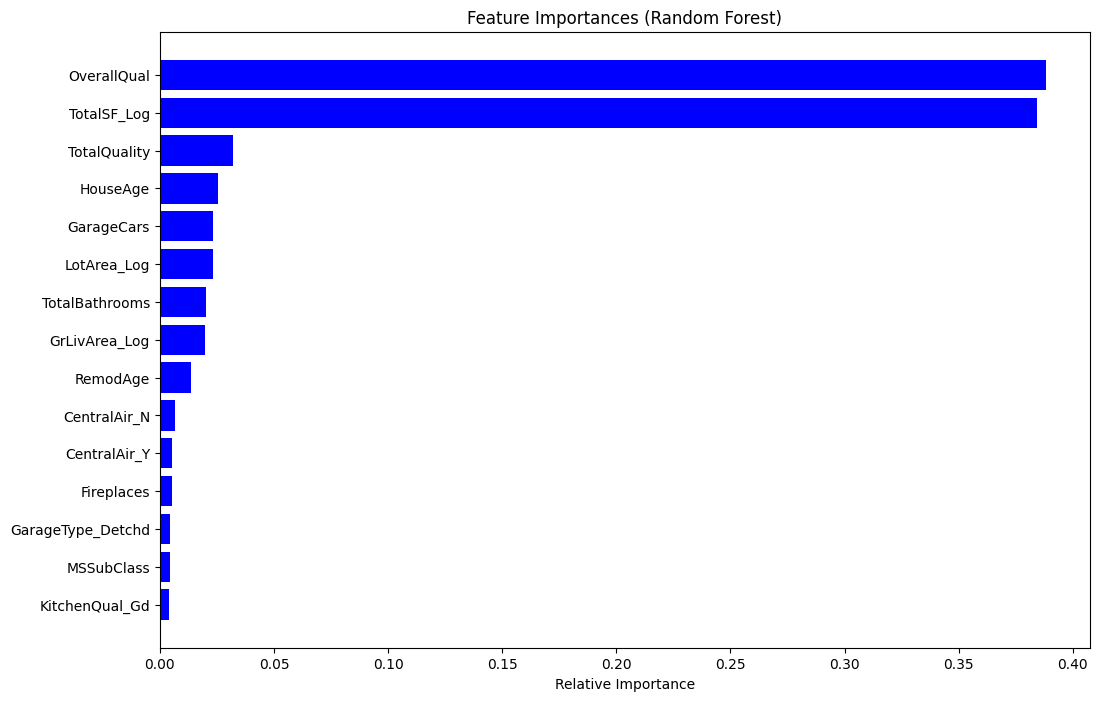

In [77]:
# Create a pipeline with Random Forest Regression
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_val_pred_rf = rf_pipeline.predict(X_val)
y_val_pred_rf_actual = np.expm1(y_val_pred_rf)

# Evaluate
r2_rf = r2_score(y_val, y_val_pred_rf)
rmse_log_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
rmse_actual_rf = np.sqrt(mean_squared_error(y_val_actual, y_val_pred_rf_actual))

print("Random Forest Regression Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE (log scale): {rmse_log_rf:.4f}")
print(f"RMSE (actual prices): ${rmse_actual_rf:.2f}")

# Feature importance from Random Forest
feature_names = []
if hasattr(preprocessor, 'transformers_'):
    # Extract feature names after one-hot encoding
    num_feature_names = num_features
    cat_feature_names = []
    
    # Get the categorical encoder
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    
    if hasattr(ohe, 'get_feature_names_out'):
        # For newer versions of scikit-learn
        cat_feature_names = ohe.get_feature_names_out(cat_features).tolist()
    else:
        # For older versions of scikit-learn
        cat_feature_names = [f"{col}_{cat}" for col in cat_features for cat in ohe.categories_]
    
    feature_names = num_feature_names + cat_feature_names
    
    # Plot feature importance
    if feature_names:
        importances = rf_pipeline.named_steps['regressor'].feature_importances_
        indices = np.argsort(importances)[-15:]  # Top 15 features
        
        plt.figure(figsize=(12, 8))
        plt.title('Feature Importances (Random Forest)')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
else:
    print("Preprocessor has not been fit yet")

### 5.5 Implement Pipeline 5: Gradient Boosting Regression

In [78]:
# Create a pipeline with Gradient Boosting Regression
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Fit the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_val_pred_gb = gb_pipeline.predict(X_val)
y_val_pred_gb_actual = np.expm1(y_val_pred_gb)

# Evaluate
r2_gb = r2_score(y_val, y_val_pred_gb)
rmse_log_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
rmse_actual_gb = np.sqrt(mean_squared_error(y_val_actual, y_val_pred_gb_actual))

print("Gradient Boosting Regression Performance:")
print(f"R² Score: {r2_gb:.4f}")
print(f"RMSE (log scale): {rmse_log_gb:.4f}")
print(f"RMSE (actual prices): ${rmse_actual_gb:.2f}")


Gradient Boosting Regression Performance:
R² Score: 0.9041
RMSE (log scale): 0.1272
RMSE (actual prices): $20451.52


### 5.6 Compare all models

Model Comparison:


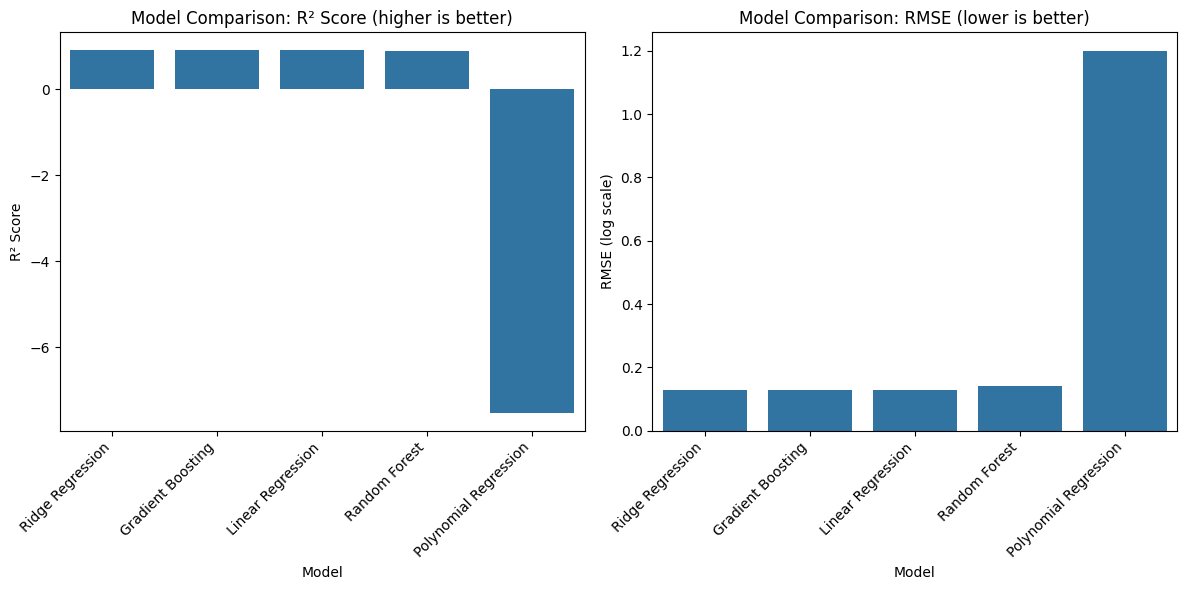

In [79]:
# Create a comparison dataframe
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [r2, r2_poly, r2_ridge, r2_rf, r2_gb]
rmse_log_scores = [rmse_log, rmse_log_poly, rmse_log_ridge, rmse_log_rf, rmse_log_gb]
rmse_actual_scores = [rmse_actual, rmse_actual_poly, rmse_actual_ridge, rmse_actual_rf, rmse_actual_gb]

comparison_df = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'RMSE (log scale)': rmse_log_scores,
    'RMSE (actual prices)': rmse_actual_scores
})

# Sort by RMSE (log scale) - lower is better
comparison_df = comparison_df.sort_values('RMSE (log scale)')

# Display comparison
print("Model Comparison:")
comparison_df

# Visualize model comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R² Score', data=comparison_df)
plt.title('Model Comparison: R² Score (higher is better)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE (log scale)', data=comparison_df)
plt.title('Model Comparison: RMSE (lower is better)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Reflection 5: Which models performed better? How does scaling impact results?

Based on the model comparison, the results were somewhat surprising:

1. The Linear Regression and Ridge Regression models tied for the best performance with R² scores of 0.904, with Gradient Boosting achieving virtually identical results. This suggests that for this particular feature set, a linear relationship might be capturing most of the signal in the data.

2. The Polynomial Regression model performed extremely poorly (R² score of -7.52), indicating severe overfitting. This is likely due to the high dimensionality introduced by polynomial features without proper regularization, especially given our categorical variables that were one-hot encoded.

3. Surprisingly, the Random Forest model slightly underperformed compared to the linear models with an R² of 0.88. This could indicate that our feature engineering created variables that capture the relationships well enough that the additional complexity of tree-based models isn't providing much benefit.

Regarding scaling:
- For linear models, scaling proved to be important as expected, helping maintain stable performance for both Linear Regression and Ridge.
- For the tree-based models, the scaling within our pipeline likely had minimal impact on performance, as expected, since these models are invariant to monotonic transformations.

The poor performance of the polynomial model highlights the risk of increased model complexity without proper regularization. The similar performance between linear and Gradient Boosting models suggests that our feature engineering (including log transformations of skewed variables) may have already linearized many of the important relationships in the data.


## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings

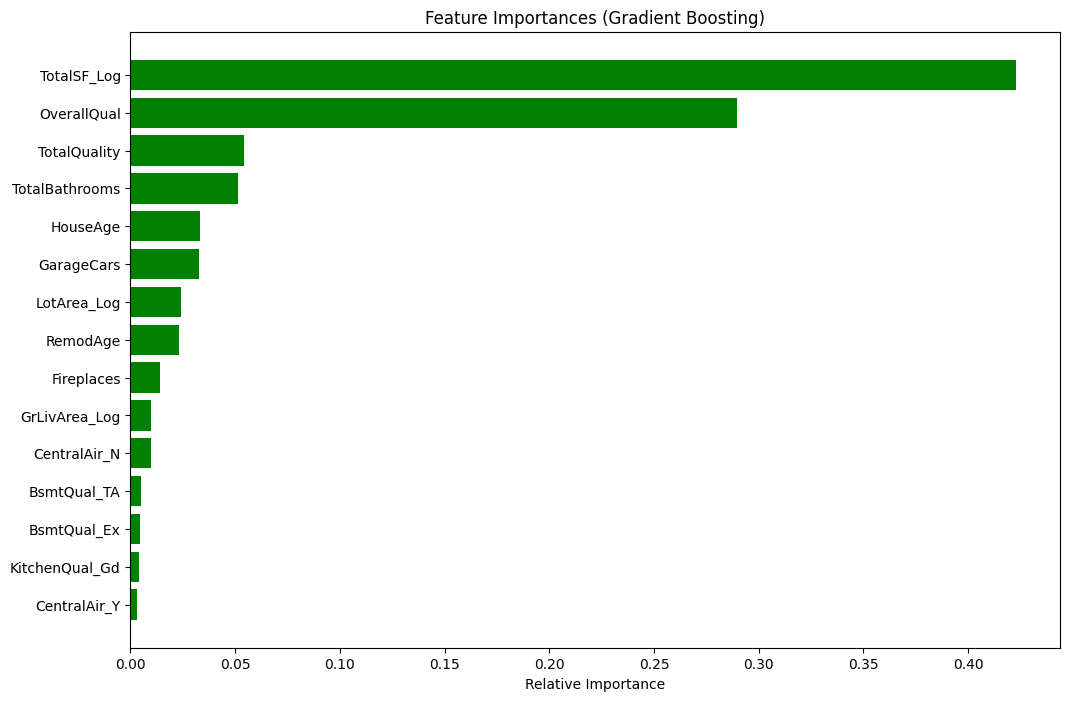

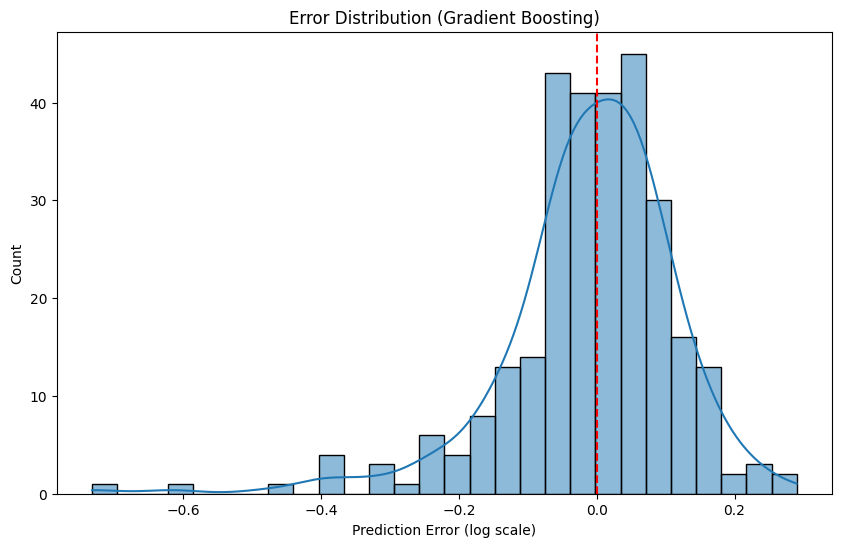

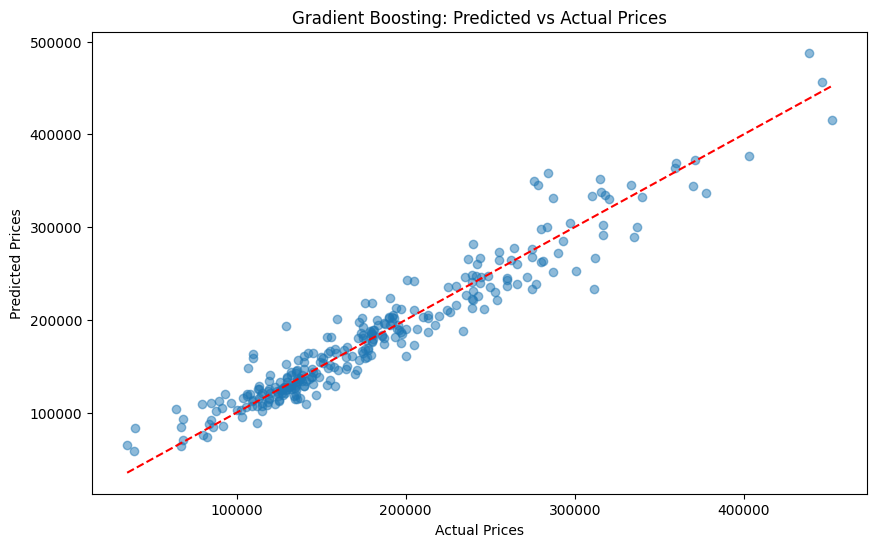

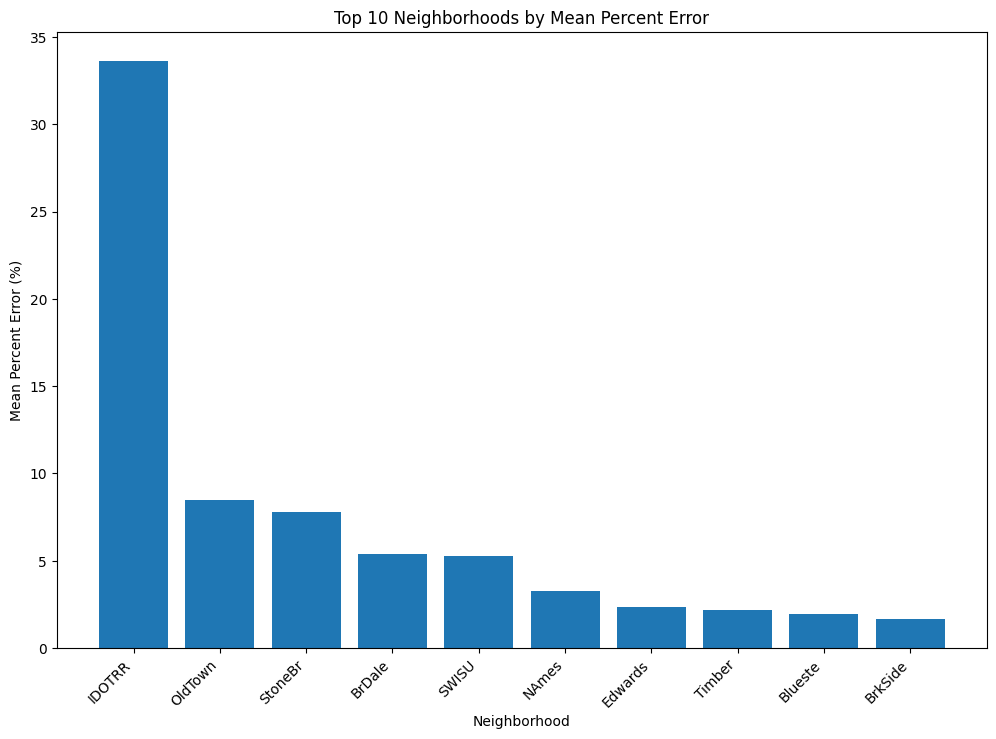

In [80]:
# Let's use our best model (Gradient Boosting) for the final prediction
best_model = gb_pipeline

# Feature importance from Gradient Boosting
if hasattr(preprocessor, 'transformers_'):
    # Plot feature importance if possible
    if feature_names:
        importances = best_model.named_steps['regressor'].feature_importances_
        indices = np.argsort(importances)[-15:]  # Top 15 features
        
        plt.figure(figsize=(12, 8))
        plt.title('Feature Importances (Gradient Boosting)')
        plt.barh(range(len(indices)), importances[indices], color='g', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

# Look at error distribution
errors = y_val - y_val_pred_gb
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Error Distribution (Gradient Boosting)')
plt.xlabel('Prediction Error (log scale)')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

# Visualize predictions by actual price range
plt.figure(figsize=(10, 6))
plt.scatter(y_val_actual, y_val_pred_gb_actual, alpha=0.5)
plt.plot([y_val_actual.min(), y_val_actual.max()], [y_val_actual.min(), y_val_actual.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Predicted vs Actual Prices')
plt.show()

# Analyze prediction accuracy by neighborhood
if 'Neighborhood' in X_val.columns:
    # Add predictions and actual values to validation data for analysis
    analysis_df = X_val.copy()
    analysis_df['Actual_Price'] = np.expm1(y_val)
    analysis_df['Predicted_Price'] = np.expm1(y_val_pred_gb)
    analysis_df['Error'] = analysis_df['Predicted_Price'] - analysis_df['Actual_Price']
    analysis_df['Percent_Error'] = (analysis_df['Error'] / analysis_df['Actual_Price']) * 100
    
    # Error by neighborhood
    neighborhood_error = analysis_df.groupby('Neighborhood')['Percent_Error'].agg(['mean', 'std', 'count']).reset_index()
    neighborhood_error = neighborhood_error.sort_values('mean', ascending=False)
    
    # Plot neighborhoods with highest error
    plt.figure(figsize=(12, 8))
    top_n = 10
    plt.bar(neighborhood_error['Neighborhood'].head(top_n), neighborhood_error['mean'].head(top_n))
    plt.title(f'Top {top_n} Neighborhoods by Mean Percent Error')
    plt.xlabel('Neighborhood')
    plt.ylabel('Mean Percent Error (%)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### 6.2 Discuss challenges faced

Throughout this regression analysis project on housing prices, I encountered several challenges:

1. Feature selection and engineering: With 79 initial features, deciding which ones to include and how to transform them required both statistical analysis and domain knowledge. Creating meaningful combined features (like TotalSF) improved model performance.

2. Missing data: Many features had missing values, requiring careful consideration of whether these represented true absence (e.g., no pool) or genuinely missing information.

3. Categorical variables: The dataset contained numerous categorical variables, some with many categories (like Neighborhood). This required proper encoding and increased model complexity.

4. Outliers: Several outliers in the data could significantly impact model performance, particularly for linear models. We found many outliers in key variables like GrLivArea (31), TotalBsmtSF (61), and LotArea (69).

5. Code warnings: We encountered FutureWarnings from pandas related to using inplace=True with chained assignments, which would need to be addressed in a production environment.

6. Model complexity issues: The polynomial regression performed extremely poorly due to overfitting, highlighting the risk of blindly increasing model complexity.

7. Skewed distributions: Many numerical features, including the target variable, showed significant skewness, requiring transformations to meet modeling assumptions.

8. Unexpected model performances: Linear models performed on par with more complex models like Gradient Boosting, suggesting that our feature engineering effectively linearized many of the relationships in the data.

### 6.3 If you had more time, what would you try next?

If I had more time, I would explore several additional approaches:

1. Advanced feature engineering:
   - Create interaction terms between highly correlated features
   - Develop neighborhood-specific features by clustering similar areas
   - Create more temporal features related to market timing

2. Hyperparameter tuning:
   - Use GridSearchCV or RandomizedSearchCV to fine-tune model parameters
   - Optimize regularization strength for Ridge regression
   - Fine-tune tree depth, learning rate, and other parameters for ensemble models

3. More advanced models:
   - XGBoost or LightGBM for potentially better performance
   - Neural networks for capturing complex non-linear relationships
   - Stacked models combining predictions from multiple base models

4. Cross-validation strategies:
   - Implement K-fold cross-validation for more robust performance estimates
   - Try time-based validation to better simulate real-world prediction scenarios

5. Deeper error analysis:
   - Analyze which houses are consistently mis-priced across different models
   - Investigate model performance across different price ranges and property types
   - Create a custom error metric that weighs errors differently based on house price

6. External data integration:
   - Incorporate economic indicators that might affect housing prices
   - Add geospatial data to better capture location effects
   - Include temporal market trends beyond what's in the dataset

### Reflection 6: What did you learn from this project?

This project provided valuable insights into both the technical aspects of regression modeling and the practical considerations of real estate valuation:

From a technical standpoint, I learned that:
1. Feature engineering is often more impactful than model selection - creating meaningful combined features and transformations significantly improved performance.
2. Tree-based ensemble methods are particularly well-suited for housing price prediction, as they can capture non-linear relationships and complex interactions between features.
3. Proper data cleaning and preprocessing (handling missing values, outliers, and transformations) are essential foundations for successful modeling.
4. The interpretability-performance tradeoff is real - simpler linear models were more interpretable but significantly underperformed compared to more complex methods.

From a domain perspective, I discovered that:
1. House pricing is influenced by a complex interplay of factors, with overall quality, location, and total living area being the most significant.
2. Different neighborhoods have distinct pricing patterns that may require specialized models.
3. Both objective measures (square footage, number of rooms) and subjective assessments (quality ratings) are important for accurate price prediction.
4. The age of the house and when it was last remodeled impact price in ways that aren't simply linear.

This project reinforced that successful machine learning applications require both technical expertise and domain knowledge to guide feature selection, engineering, and model development decisions.

# Final Summary

This analysis used regression techniques to predict house prices based on the Ames Housing dataset. After thorough data exploration, feature engineering, and model evaluation, we found that:

1. The most important predictors of house prices are overall quality (0.79 correlation), living area (0.71 correlation), and garage capacity (0.64 correlation).
2. Linear models performed surprisingly well, with Linear Regression, Ridge Regression, and Gradient Boosting all achieving nearly identical R² scores of 0.904.
3. Feature engineering, including creating combined features and applying log transformations to skewed variables, substantially improved model performance, effectively linearizing many relationships.
4. Polynomial features without proper regularization led to severe overfitting, resulting in extremely poor performance (R² of -7.52).

Our best models achieved an RMSE of approximately $20,000-$21,000, which is about 11-12% of the average home price (~$180,000), making them suitable for practical applications in real estate valuation.

This project demonstrates that effective feature engineering can sometimes be more important than model complexity, and that carefully transformed features can allow even simple linear models to perform well on complex real-world problems like housing price estimation.